In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("t-E.csv")

In [ ]:
df

,t,E/mV
0,26,1052.33
1,29,1045.72
2,32,1042.27
3,35,1041.01
4,38,1040.89
5,41,1038.77
6,44,1035.65


In [ ]:
df["T/K"] = df["t"] + 273.15

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

a: 4594.156899792551, b: -22.282812184559674, c: 0.03489403397134453


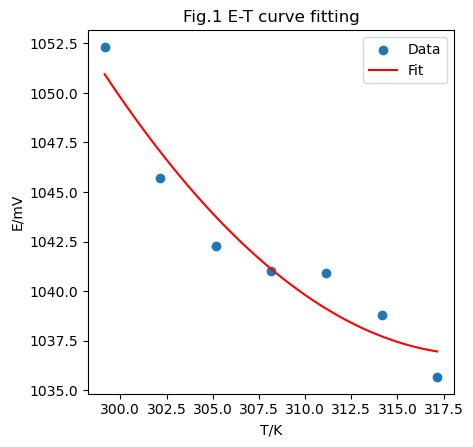

In [ ]:
def func(T, a, b, c):
    return a + b * T + c * T**2

# 提取温度和电势数据作为NumPy数组
T_data = df['T/K'].values
E_data = df['E/mV'].values

# 初始参数猜测
initial_guess = (1, 1, 1)

# 使用curve_fit拟合数据
params, covariance = curve_fit(func, T_data, E_data, p0=initial_guess)

# 获取最佳拟合参数
a_fit, b_fit, c_fit = params

# 打印最佳参数
print(f'a: {a_fit}, b: {b_fit}, c: {c_fit}')

# 生成拟合曲线的数据点
T_fit = np.linspace(min(T_data), max(T_data), 100)
E_fit = func(T_fit, a_fit, b_fit, c_fit)

# 绘制原始数据和拟合曲线
fig, ax = plt.subplots(figsize=(4.72, 4.72))  # 1厘米 = 0.393701英寸

# 绘制原始数据和拟合曲线
ax.scatter(T_data, E_data, label='Data')
ax.plot(T_fit, E_fit, 'r-', label='Fit')
ax.set_xlabel('T/K')
ax.set_ylabel('E/mV')
ax.legend()

plt.title("Fig.1 E-T curve fitting")

# 保存图像
plt.savefig('T-E.png', dpi=300, bbox_inches='tight')  # 设置dpi以提高图像质量，并使用bbox_inches='tight'来避免裁剪

# 显示图像
plt.show()

In [ ]:
2 * 298.15 * c_fit + b_fit

-1.4754997274469304

In [ ]:
t = 298.15
a_fit + b_fit * t + c_fit * t * t

1052.3865515101666

In [ ]:
df = pd.read_csv("2.csv")
df

,Potential/V,Current/A
0,-1.000,-0.00243
1,-0.999,-0.00232
2,-0.998,-0.00225
3,-0.997,-0.00218
4,-0.996,-0.00212
...,...,...
1995,0.995,0.17800
1996,0.996,0.17800
1997,0.997,0.17900
1998,0.998,0.17900


In [ ]:
s = 3.1415926 *(0.48/100*4.2/100+(0.48/2/100)**2)
s

0.0006514406415359999

In [ ]:
import numpy as np
import math
df["log(i)"] = np.log10(df.iloc[:,1]/s)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df["yita"] = -df.iloc[:,0] - 0.921

In [ ]:
df

,Potential/V,Current/A,log(i),yita
0,-1.000,-0.00243,NaN,0.079
1,-0.999,-0.00232,NaN,0.078
2,-0.998,-0.00225,NaN,0.077
3,-0.997,-0.00218,NaN,0.076
4,-0.996,-0.00212,NaN,0.075
...,...,...,...,...
1995,0.995,0.17800,2.436545,-1.916
1996,0.996,0.17800,2.436545,-1.917
1997,0.997,0.17900,2.438978,-1.918
1998,0.998,0.17900,2.438978,-1.919


In [ ]:
xx = df[df.iloc[:,0]>-0.5].iloc[:,2]
mmin = np.argmin(df[df.iloc[:,0]>-0.5].iloc[:,2])
xx[mmin:]

608    -0.493729
609    -0.491656
610    -0.491656
611    -0.491656
612    -0.489592
          ...   
1995    2.436545
1996    2.436545
1997    2.438978
1998    2.438978
1999    2.438978
Name: log(i), Length: 1392, dtype: float64

107


<Figure size 6400x4800 with 0 Axes>

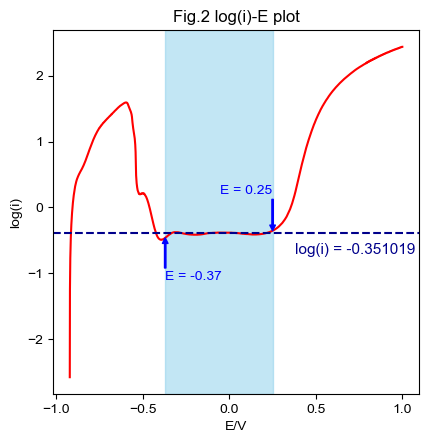

In [ ]:
plt.figure(dpi=1000)
fig, ax = plt.subplots(figsize=(4.72, 4.72)) 
# 绘制原始数据和拟合曲线
ax.plot(df.iloc[:,0], df.iloc[:,2], 'r-')
ax.set_xlabel('E/V')
ax.set_ylabel('log(i)')

mmin = np.argmin(df[df.iloc[:,0]>-0.5].iloc[:,2])
print(mmin)

plt.title("Fig.2 log(i)-E plot")
plt.axvspan(-0.37, 0.25,color='skyblue', alpha=0.5, label='第二次大幅上升区间')
plt.rcParams['font.family'] = 'Arial'
plt.axhline(y = -0.3910192, color = "darkblue", linestyle = "--")
plt.annotate('E = -0.37', xy=(-0.37, -0.463627), xytext=(-0.37, -0.463627-0.5),
             arrowprops=dict(color='blue', headwidth=4, width=1,
                            headlength=4),
                             horizontalalignment='left', verticalalignment='top', color = "blue")
plt.annotate('E = 0.25', xy=(0.25, -0.354482), xytext=(0.25, -0.354482+ 0.7),
             arrowprops=dict(color='blue', headwidth=4, width=1,
                            headlength=4),
                             horizontalalignment='right', verticalalignment='top', color = "blue")
plt.text(0.38,-0.7,'log(i) = -0.351019', fontsize = 11, color = "darkblue")
plt.savefig('log(i)-E.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df[670:1383].iloc[:,2].mean()

-0.3510192990348484

In [ ]:
xx[1383]

0.25058313975055063

In [ ]:
df[df.iloc[:,0]==0.25]

,Potential/V,Current/A,log(i),yita
1250,0.25,0.000288,-0.354482,-1.171


In [ ]:
df.iloc[:,1]


0      -0.00243
1      -0.00232
2      -0.00225
3      -0.00218
4      -0.00212
         ...   
1995    0.17800
1996    0.17800
1997    0.17900
1998    0.17900
1999    0.17900
Name:  Current/A, Length: 2000, dtype: float64